# Analytics for Job 2706036

Associated with issue 10 on the kanban board for optimizing deepmd hyperparameters.

* 500 nodes with one Dask worker per node
* max births: 3000
* population size: 25

Ok, let's see what we got.  Let's look at `2706036_individuals.csv`, which contains *all* the individuals generated during the run.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
cd /gpfs/alpine/proj-shared/chm187/runs/10-set-up-for-deepmd/2706036

/gpfs/alpine/chm187/proj-shared/runs/10-set-up-for-deepmd/2706036


In [3]:
inds_df = pd.read_csv('2706036_individuals.csv')

In [4]:
len(inds_df) # how many individuals did we generate?

3814

In [5]:
inds_df

,job,hostname,pid,uuid,birth_id,start_lr,stop_lr,rcut_smth,rcut,decay_steps,training_batch_size,validation_batch_size,scale_by_worker,start_eval_time,stop_eval_time,fitness
0,2706036,batch2,3220764,2497cbfd-7e85-47f1-bce5-7ad141b77f71,221,0.002135,0.000046,2.849824,6.240864,3451,4,3,none,1.675745e+09,1.675745e+09,NaN
1,2706036,batch2,3220764,002efd30-5392-4dfe-9cb4-04a3fde7ced1,550,0.002834,0.000013,2.875735,7.485121,4846,7,7,none,1.675745e+09,1.675745e+09,NaN
2,2706036,batch2,3220764,97609c37-fe33-4449-be17-8fd21e20e1f8,1000,0.005769,0.000005,3.735287,9.834631,3695,7,5,none,1.675745e+09,1.675745e+09,NaN
3,2706036,batch2,3220764,5efab954-ee17-43cc-b602-6ab9aa628c1b,1001,0.008172,0.000031,3.889159,10.336781,9639,4,2,none,1.675745e+09,1.675745e+09,NaN
4,2706036,batch2,3220764,bfe7941c-26b8-4290-adf4-94f195d79824,1002,0.008740,0.000017,4.238257,9.150147,6495,6,7,linear,1.675745e+09,1.675745e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,2706036,batch2,3221774,0ce0f545-8519-40d4-bc73-3a87e4d83e8a,3524,0.006188,0.000007,2.494718,7.758986,8376,5,2,sqrt,1.675782e+09,1.675788e+09,0.00562
3810,2706036,batch2,3221539,dc625a1f-401a-49de-a8d9-f83a66bbfb42,3729,0.004021,0.000100,3.159377,8.844751,7162,6,3,sqrt,1.675781e+09,1.675788e+09,0.00702
3811,2706036,batch2,3220787,23cfceac-27b4-46e8-85ac-18f61a893fbe,4168,0.009030,0.000080,3.905813,11.247841,2082,2,2,sqrt,1.675785e+09,1.675788e+09,0.00618
3812,2706036,batch2,3222595,6235775a-a926-44f4-bc9e-2d5204d4a73d,4285,0.008983,0.000100,3.839782,11.182934,2186,2,2,sqrt,1.675785e+09,1.675788e+09,0.00816


In [6]:
inds_df.fitness.describe()

count    3785.000000
mean        0.005792
std         0.003190
min         0.000272
25%         0.004190
50%         0.005010
75%         0.006310
max         0.044100
Name: fitness, dtype: float64

In [7]:
inds_df['eval_time'] = inds_df.stop_eval_time - inds_df.start_eval_time

In [8]:
inds_df.eval_time.describe()

count    3814.000000
mean     5218.522083
std      1795.836768
min         0.000623
25%      3956.496859
50%      4969.819805
75%      6961.767932
max      8927.967199
Name: eval_time, dtype: float64

In [9]:
inds_df.eval_time.mean() # this excludes the bum networks that had a fitness of NaN

5218.5220831788265

In [10]:
5218 / 60 # how many minutes on average for training?

86.96666666666667

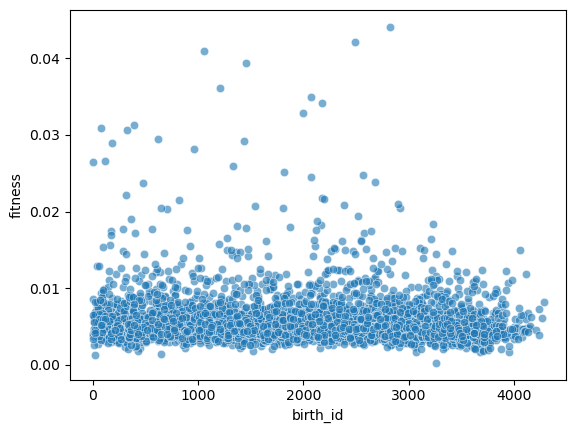

In [11]:
fitness_by_birth_plot = sns.scatterplot(data=inds_df, x='birth_id', y='fitness', alpha=0.6)

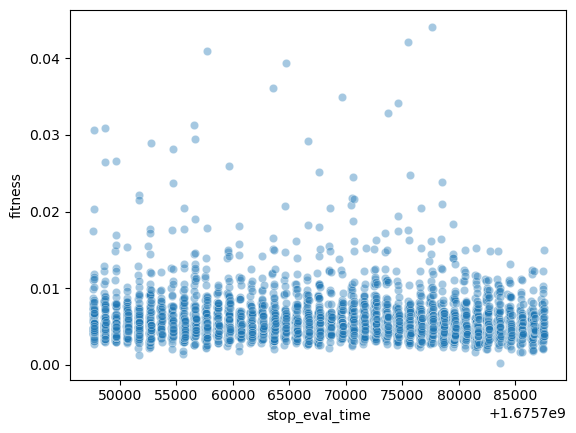

In [12]:
fitness_by_stop_time = sns.scatterplot(data=inds_df, x='stop_eval_time', y='fitness', alpha=0.4)

In [ ]:
fitness_by_stop_time.figure.

The weird striping effect means that the training was weirdly consistent from network to network.  I imagine this would be different if we also evolved the neural architectures.

In [13]:
# How many had bum runs?
howmany_good = len(inds_df.dropna())

In [14]:
howmany_good / len(inds_df)

0.9923964341898269

So, 99% were viable networks.  Good!

Let's figure out the UUID of the best individual so that we can do a deeper dive into that.

In [15]:
inds_df.iloc[inds_df.fitness.idxmin()]

job                                                   2706036
hostname                                               batch2
pid                                                   3222434
uuid                     800b3f83-2eaf-4886-b878-af7e7568abaf
birth_id                                                 3260
start_lr                                             0.007893
stop_lr                                              0.000025
rcut_smth                                            5.999914
rcut                                                      6.0
decay_steps                                              4746
training_batch_size                                         3
validation_batch_size                                       4
scale_by_worker                                        linear
start_eval_time                             1675779662.528729
stop_eval_time                              1675783655.182757
fitness                                              0.000272
eval_tim

So we can look in the "800b3f83-2eaf-4886-b878-af7e7568abaf" directory to find more stats there.

In [16]:
cd '800b3f83-2eaf-4886-b878-af7e7568abaf'

/gpfs/alpine/chm187/proj-shared/runs/10-set-up-for-deepmd/2706036/800b3f83-2eaf-4886-b878-af7e7568abaf


In [17]:
ll

total 197461
-rw-rw-r--. 1 13931      277 Feb  7 10:27 checkpoint
-rw-rw-r--. 1 13931     2450 Feb  7 09:21 input.json
-rw-rw-r--. 1 13931     3021 Feb  7 09:21 input_v2_compat.json
-rw-rw-r--. 1 13931    48694 Feb  7 10:27 lcurve.out
-rw-rw-r--. 1 13931 37612168 Feb  7 10:22 model.ckpt-46000.data-00000-of-00001
-rw-rw-r--. 1 13931     8099 Feb  7 10:22 model.ckpt-46000.index
-rw-rw-r--. 1 13931  2779305 Feb  7 10:22 model.ckpt-46000.meta
-rw-rw-r--. 1 13931 37612168 Feb  7 10:23 model.ckpt-47000.data-00000-of-00001
-rw-rw-r--. 1 13931     8099 Feb  7 10:23 model.ckpt-47000.index
-rw-rw-r--. 1 13931  2779305 Feb  7 10:23 model.ckpt-47000.meta
-rw-rw-r--. 1 13931 37612168 Feb  7 10:24 model.ckpt-48000.data-00000-of-00001
-rw-rw-r--. 1 13931     8099 Feb  7 10:24 model.ckpt-48000.index
-rw-rw-r--. 1 13931  2779305 Feb  7 10:24 model.ckpt-48000.meta
-rw-rw-r--. 1 13931 37612168 Feb  7 10:26 model.ckpt-49000.data-00000-of-00001
-rw-rw-r--. 1 13931     8099 Feb  7 10:26 model.ckpt-49000.ind

In [18]:
lcurve = np.genfromtxt('lcurve.out', names=True)

In [19]:
lcurve_df = pd.DataFrame.from_records(lcurve)

In [20]:
lcurve_df

,step,rmse_val,rmse_trn,rmse_e_val,rmse_e_trn,rmse_f_val,rmse_f_trn,lr
0,0.0,17.50,16.40,0.847000,0.847000,0.551,0.516,0.007900
1,100.0,250.00,16.30,0.166000,0.166000,7.900,0.515,0.007900
2,200.0,21.80,21.50,7.310000,7.330000,0.550,0.537,0.007900
3,300.0,35.50,17.60,4.210000,4.210000,1.090,0.501,0.007900
4,400.0,18.70,18.90,2.470000,2.470000,0.574,0.580,0.007900
...,...,...,...,...,...,...,...,...
496,49600.0,1.24,1.25,0.000034,0.000034,0.546,0.548,0.000033
497,49700.0,1.20,1.27,0.000006,0.000004,0.527,0.558,0.000033
498,49800.0,1.25,1.24,0.000147,0.000146,0.549,0.545,0.000033
499,49900.0,1.24,1.23,0.000050,0.000048,0.545,0.540,0.000033


<AxesSubplot: xlabel='step', ylabel='rmse_e_val'>

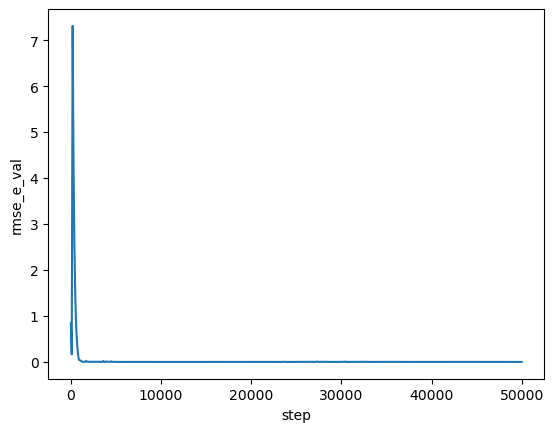

In [21]:
sns.lineplot(data=lcurve_df, x='step', y='rmse_e_val')

<AxesSubplot: xlabel='step', ylabel='rmse_e_val'>

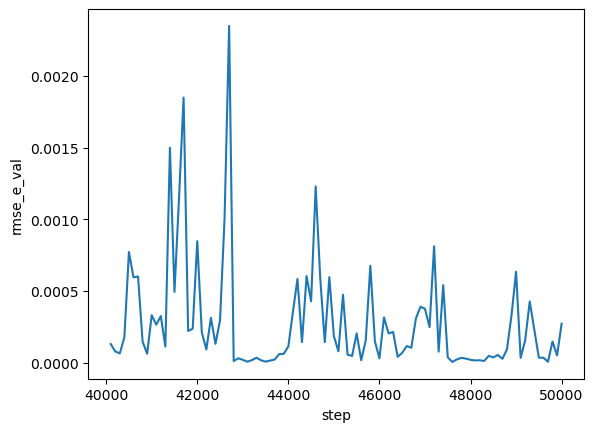

In [28]:
sns.lineplot(data=lcurve_df.tail(100), x='step', y='rmse_e_val')

In [1]:
ls

run2706036.ipynb
